<a href="https://colab.research.google.com/github/miladziekanowska/Data_Analytics/blob/main/Pandas_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning data in Pandas DataFrame
Data cleaning is one of the tedious parts of work as a Data Analyst or Data Scientist, but it is one of the most important part of the the field - well prepared data can give us more insight and therefore allow us to make better informed decisions and train our models properly.

This notebook takes up quite a lot of examples of nessesary data cleaning with a few solutions, with the problems listed here:
1. Correcting the data type to our needs
2. Splitting the date and string columns
3. Handling missing data and NaN valeus
4. Detecting and dealing with outliers
5. Detecting duplicates
5. Data Standarization
6. Data Discretization
7. Data Normalization
8. Log Transformations
9. One-hot encoding and Target encoding
10. Data scaling
11. Profiling


Okay, let's get to work with the imports and first DataFrame.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
import random

We won't be doing any visualisations in this notebook I think, but it's a good practice to be prepared here. 

## 1. Correcting the columns
Before we jump in to any other cleaning and changes with our data, it is best to get to know it a little bit better. We need to see which columns have which type and decide, if we are going to group by some colums, or calculate some columns, etc. 

For this example, let's use the sales dataset from last notebook, this time I will translate all the name  of the colums do it's clearer.

In [2]:
sales_df = pd.read_csv('dane_sprzedaz.csv', sep=',', encoding='utf-8')
sales_df.columns = ['DATE', 'SHOP_ID', 'ITEM_ID', 'NET_PRICE', 'PROFIT_PERC', 'PROFIT']
sales_df

,DATE,SHOP_ID,ITEM_ID,NET_PRICE,PROFIT_PERC,PROFIT
0,01.05.2022,1,1,416.0,9,"37,44"
1,02.05.2022,1,1,454.0,2,"9,08"
2,03.05.2022,1,1,392.0,13,"50,96"
3,04.05.2022,1,1,498.0,9,"44,82"
4,05.05.2022,1,1,341.0,15,"51,15"
...,...,...,...,...,...,...
130,11.05.2022,3,3,374.0,7,"26,18"
131,12.05.2022,3,3,390.0,4,"15,6"
132,13.05.2022,3,3,485.0,10,"48,5"
133,14.05.2022,3,3,479.0,3,"14,37"


In [3]:
# DataFrame ready, let's check the columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         135 non-null    object 
 1   SHOP_ID      135 non-null    int64  
 2   ITEM_ID      135 non-null    int64  
 3   NET_PRICE    133 non-null    float64
 4   PROFIT_PERC  135 non-null    int64  
 5   PROFIT       135 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 6.5+ KB


We see that the DATE and PROFIT columns are in type object. While for date will split that in the next topic, or change into datetype data, first we need to take care of the profit column - this is how much earnings came from an item. Logically, this should be an float value, so we could get some statistics out of it.

In [4]:
# let's first replace the coma with a dot, to have a proper form
sales_df['PROFIT'] = sales_df.PROFIT.str.replace(',', '.')
sales_df['PROFIT']

0      37.44
1       9.08
2      50.96
3      44.82
4      51.15
       ...  
130    26.18
131     15.6
132     48.5
133    14.37
134    47.58
Name: PROFIT, Length: 135, dtype: object

In [5]:
# now that we have it in proper form, since this is still an object
sales_df['PROFIT'] = sales_df.PROFIT.astype(float)
sales_df['PROFIT']

0      37.44
1       9.08
2      50.96
3      44.82
4      51.15
       ...  
130    26.18
131    15.60
132    48.50
133    14.37
134    47.58
Name: PROFIT, Length: 135, dtype: float64

In [6]:
# another computation for that could be
sales_df['PROFIT'] = pd.to_numeric(sales_df['PROFIT'])
sales_df['PROFIT']

0      37.44
1       9.08
2      50.96
3      44.82
4      51.15
       ...  
130    26.18
131    15.60
132    48.50
133    14.37
134    47.58
Name: PROFIT, Length: 135, dtype: float64

There are also two other function to change the data type in a column, for example if we would like to change the SHOP_ID value to string or object - since this is a shop's id, we won't be looking for maximum value or sum of the shops ids.   
Good explanation on two remaining methods can be found on [StackOverflow](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas).  
There are also other Pandas methods like `.to_numeric()`, as presented below.

In [7]:
# as mentioned, we could also change the DATE from an object type to a datetime type
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], errors = 'coerce', dayfirst=True)
# dayfirst=True is important if we want the dates in a European date structure - if we leave it out,
# it will provide us with the American, month-first structure
sales_df['DATE']

0     2022-05-01
1     2022-05-02
2     2022-05-03
3     2022-05-04
4     2022-05-05
         ...    
130   2022-05-11
131   2022-05-12
132   2022-05-13
133   2022-05-14
134   2022-05-15
Name: DATE, Length: 135, dtype: datetime64[ns]

In [8]:
# Let's go through one more example for quick corrections
df2 = pd.DataFrame({
    'NAME': ['APPLES', 'PEARS', 'STRAWBERRIES'],
    'PRICE': ['$ 3.22', '$ 3.22',  '$ 3.22']
})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    3 non-null      object
 1   PRICE   3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


The PRICE is once again, not a float but an object and it contains the $. We could replace it with, the same way we did last time `.replace('$ ', '')`, but let's go other route.

In [9]:
remove_dol = lambda x: float(x[2:]) # we are trimming the values with this code
df2['PRICE_IN_DOLLARS'] = df2.PRICE.apply(remove_dol) # creating a new column with float values
df2

,NAME,PRICE,PRICE_IN_DOLLARS
0,APPLES,$ 3.22,3.22
1,PEARS,$ 3.22,3.22
2,STRAWBERRIES,$ 3.22,3.22


One more important and useful tip is to remember about the `.strip()` method for string values, which could help us avoid stupid duplicate values in object columns, especially if these were typed in by different people or from a survey and some might have pressed space on too many times.

## 2. Splitting data fom one to many columns and concatenating
Now that we have the sales_df columns in correct data types, let's see how we can get even more information from the date, as there are quite a few informations - year, month and day.

In [10]:
# We need to create new columns for all the values we want - year, month and date
sales_df['YEAR'] = sales_df['DATE'].dt.year
sales_df['MONTH'] = sales_df['DATE'].dt.month
sales_df['DAY'] = sales_df['DATE'].dt.day
sales_df

,DATE,SHOP_ID,ITEM_ID,NET_PRICE,PROFIT_PERC,PROFIT,YEAR,MONTH,DAY
0,2022-05-01,1,1,416.0,9,37.44,2022,5,1
1,2022-05-02,1,1,454.0,2,9.08,2022,5,2
2,2022-05-03,1,1,392.0,13,50.96,2022,5,3
3,2022-05-04,1,1,498.0,9,44.82,2022,5,4
4,2022-05-05,1,1,341.0,15,51.15,2022,5,5
...,...,...,...,...,...,...,...,...,...
130,2022-05-11,3,3,374.0,7,26.18,2022,5,11
131,2022-05-12,3,3,390.0,4,15.60,2022,5,12
132,2022-05-13,3,3,485.0,10,48.50,2022,5,13
133,2022-05-14,3,3,479.0,3,14.37,2022,5,14


Great! Now we can check what is the range from the first to last day, how many months and years are there, etc.


In [11]:
# Let's make another example, this time with string objects in the column
df = pd.DataFrame({
    'Address': ['4860 Sunset Boulevard,San Francisco,California',
                '3055 Paradise Lane,Salt Lake City,Utah',
                '682 Main Street,Detroit,Michigan',
                '9001 Cascade Road,Kansas City,Missouri']
})
df

,Address
0,"4860 Sunset Boulevard,San Francisco,California"
1,"3055 Paradise Lane,Salt Lake City,Utah"
2,"682 Main Street,Detroit,Michigan"
3,"9001 Cascade Road,Kansas City,Missouri"


In [12]:
# Now we see that all these Addresses have same template, so we want to split it
df['Address'].str.split(',', expand=True) # expand=True creates new columns from the split
# if we do not add it, we will get a list for reach row, where every split will create new element
# this is however only temporary view!

,0,1,2
0,4860 Sunset Boulevard,San Francisco,California
1,3055 Paradise Lane,Salt Lake City,Utah
2,682 Main Street,Detroit,Michigan
3,9001 Cascade Road,Kansas City,Missouri


In [13]:
# To create a safe columns, we would have to do is similar to the date, or we can use another computation
df = df.assign(Street = df['Address'].str.split(',', expand=True)[0],
               City = df['Address'].str.split(',', expand=True)[1],
               State = df['Address'].str.split(',', expand=True)[2])
# we can now delete the Address, since we will create a few new ;)
df = df.drop(['Address'], axis=1)

Now that we know how to split different data into new columns, what if we would like to join two or more columns?  
As with all concatenations, it is important that the concatenated data should be the same data type. If they aren't in the columns, we need to convert them in out concatenating code.

In [14]:
# Let's do one example from the DataFrame above
# To create a concatenated column, we of course need to create a new column
df['City_State'] = df['City'] + " - " + df['State']
df

,Street,City,State,City_State
0,4860 Sunset Boulevard,San Francisco,California,San Francisco - California
1,3055 Paradise Lane,Salt Lake City,Utah,Salt Lake City - Utah
2,682 Main Street,Detroit,Michigan,Detroit - Michigan
3,9001 Cascade Road,Kansas City,Missouri,Kansas City - Missouri


In [15]:
# the easiest concatenation ever
# let's try different syntax 
df['Address_New'] = df[['Street', 'City', 'State']].apply(', '.join, axis=1)
df

,Street,City,State,City_State,Address_New
0,4860 Sunset Boulevard,San Francisco,California,San Francisco - California,"4860 Sunset Boulevard, San Francisco, California"
1,3055 Paradise Lane,Salt Lake City,Utah,Salt Lake City - Utah,"3055 Paradise Lane, Salt Lake City, Utah"
2,682 Main Street,Detroit,Michigan,Detroit - Michigan,"682 Main Street, Detroit, Michigan"
3,9001 Cascade Road,Kansas City,Missouri,Kansas City - Missouri,"9001 Cascade Road, Kansas City, Missouri"


## 3. Handling missing values 
There are a few types of missing values in a DataFrame, which might cause some issues with the outcome and modeling.  
These values could be put in a following list:  
`falsy_values = (0, False, None, '', [], {})`  
Don't get it wrong, 0 within a numeric column often won't be a missing data - it is important to know the context of the column before we start to clean it. With numeric data, if 0 is and outlier, it still gives us some information and might not be a mistake - it could mean that, for example, a store was closed that day, therefore the total retails is 0. Even more so, if 0 is within the range, then we don't touch it, as this most likely a totally valid data, especially if there are not many of it. However, if we get a 0 within object columns, this might be a missing value or no answer.

Pandas also have their own version of missing values, which is *NaN*.   
The difference between NaN and None value is that if we have a NaN value in a numeric column, this won't print out errors, unlike None. However, NaN might affect the outcome of the operation.


In [16]:
# Let's use a new DataFrame, that has missing values
dates = pd.date_range('20230401', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), 
                  index=dates, 
                  columns=list('ABCD'))
df['D'] = -5
df['E'] = [np.nan, -1,-2,-3, -4, -5]
df['F'] = [1,2, np.nan, np.nan,np.nan, np.nan]
df

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,NaN,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,NaN
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,NaN
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,NaN
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,NaN


In [17]:
# we can already see them, since this DataFrame is small, but let's check the info first
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-04-01 to 2023-04-06
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      int64  
 4   E       5 non-null      float64
 5   F       2 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 336.0 bytes


Info method gives us quite a lot of useful information here.  
We see that in the column E there is one null-value and in column F there are only 2 non-null values - 2/3 of data is missing. While the one missing value in column E might not throw off our analysis (it might, if under this missing value hiddes an outlier), but with 2/3 of information missing are not good source of information either.

**What do we do, if we see many missing values?**  
1. We try to get these missing values from somewhere - from our client, from data engineers, from data bank, etc., wherever our data came from;
2. We try to solve these using bussiness logic - perhaps these missing values are for something - days off, system errors, someone forgot to input the data, maybe the item has been discontinued, etc.;
3. If we cannot get the data from anyone and we can't come up with a bussiness solution, we can fill these using statistics and math.

If we do not get the data from somewhere, based on the bussiness logic, we can do a few things with the missing data:
- *delete the rows with missing values* - it depends very much on the size of the dataset. Say we would have a few missing values in a large, or even medium-large data set, this shouldn't throw off the results too much. However, if that would throw off the distribution or does not cut out a whole category from another column. If these missing valeus are spead out pretty evenly and there are not many of them, we can delete them;
- *delete the whole column* - depending on situation and columns importance. If we are missing more than a half of the data in one column, we can't get them, and it's not crucial - perhaps this would be the best option. Or, we could delete the rows and work on a sample that contains the data;
- *ignore the missing values* - not the best solution overall, but also a possible approach. In this case, it would be best to provide the statistical values with and without the missing values in the report;
- *fill with "unknown"* - works better with categorical data than numerical, could be useful at the begining stage of the analysis, but it would differ everytime for the latter stages;
- *fill* - and we can distinguish quite a few ways to fill the unknown, besides "unknown":
  - fill with the value from above or from below;
  - fill with the mean or median;
  - fill with the result from interpolation;
  - fill with the data from a model.

While there are quite a lot of methods, everytime we get to know a new dataset and we find missing values, we need to carefully choose the most optimised approach to deal with it. There is no *one size fits all* solution.


In [18]:
# In here we have a practice dataset, so the actual outcome is not as important,
# therefore we will try a few solutions

In [19]:
df[df.isna().any(axis=1)] # let's display all the rows with the missing values

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,NaN,1.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,NaN
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,NaN
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,NaN
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,NaN


In [20]:
# now let's drop them
df.dropna() 

,A,B,C,D,E,F
2023-04-02,-0.842349,1.687147,1.06061,-5,-1.0,2.0


In [21]:
# Not a lot is left in this dataset, right? Maybe let's only drop full NaN rows
df.dropna(how='all')

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,NaN,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,NaN
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,NaN
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,NaN
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,NaN


In [22]:
# Huh, there aren't any full NaN rows. But the F column seems to be missing a lof of values. 
# Maybe it's better to just drop the F column
df.drop(['F'], axis=1) # much less NaNs

,A,B,C,D,E
2023-04-01,-0.400176,-0.678101,0.831397,-5,NaN
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0


In [23]:
# Okay, what if we don't want to drop the NaN values, but fill them with the upper one?
df.fillna(method='ffill')

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,NaN,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,2.0
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,2.0
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,2.0
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,2.0


In [24]:
# There still is one NaN. The value is first in the column, so maybe lets fill it with the lower
df.fillna(method='bfill') # we didn't save the DataFrame, so we don't have the results from last action

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,-1.0,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,NaN
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,NaN
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,NaN
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,NaN


In [25]:
# Maybe let's not fill with the random data.
# How about we use the mean to use on the F column and median for E?
# Let's do it in a copy
df2 = df.copy()
df2['E'].fillna(df2['E'].median().round(1), inplace=True)
df2 # for E

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,-3.0,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,NaN
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,NaN
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,NaN
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,NaN


In [26]:
# and let's use different method to fill F with mean
df2['F'].replace([np.nan], df2['F'].mean(), inplace=True)
df2

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,-3.0,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,1.5
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,1.5
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,1.5
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,1.5


In [27]:
# At last, let's try interpolation
df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
# similarely as with ffill and bfill, depending on the direction we might not catch 
# all the values at once
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df

,A,B,C,D,E,F
2023-04-01,-0.400176,-0.678101,0.831397,-5,-1.0,1.0
2023-04-02,-0.842349,1.687147,1.060610,-5,-1.0,2.0
2023-04-03,0.514854,-0.184511,-0.659029,-5,-2.0,2.0
2023-04-04,0.131042,-0.764989,1.020872,-5,-3.0,2.0
2023-04-05,0.292274,0.889389,0.748858,-5,-4.0,2.0
2023-04-06,0.812259,0.380815,1.517027,-5,-5.0,2.0


More on interpolation can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html).

We can also build ML models, that might help us with filling the missing data.   
More on that later, in Machine Learning notes.

## 4. Detecting and dealing with outliers
To begin this part, let's explain what is an outlier in statistics.   
An **outlier** is a value that varies a lot from the other values. An outlier is a data point that is distant from other similar points. In a sorted dataset, the outlier values will be the ones closes to the edges of the distribution. Not all border values will be outliers, but if the difference is significant, we can call them that.

Outliers are the values that, similarly to NaN values, can mess up our analysis. 

In [28]:
# For this example lets create a randomized DataFrame, to which we will add outliers
df = pd.DataFrame({'val1': pd.Series(np.random.randint(1, 100, 69)),
                   'val2': pd.Series(np.round(np.random.uniform(0, 1, 69),2)),
                   'name': pd.Series(np.random.choice(['meow', 'woof', 'eeek', 'puff', 'moo'], 69))})

# okay, we have a dataframe with randomized data, we dont know the range of values, 
# but let's add some definite outliers and later we will shuffle it
outliers = pd.DataFrame({'val1': [160, -69, 230, -99, -25, 197, 305, 2],
                   'val2': [0.90, 2.99, 1.78, 2.50, 1.98, 1.87, 0.67, 4.38],
                   'name': pd.Series(np.random.choice(['meow', 'woof', 'eeek', 'puff', 'moo'], 8))})

# let's merge these two
df = pd.concat([df, outliers], axis=0)

# and shuffle, so these won't be only at the end
df = df.sample(frac=1).reset_index(drop=True)
df

,val1,val2,name
0,73,0.08,eeek
1,76,0.36,woof
2,41,0.58,moo
3,8,0.93,eeek
4,52,0.79,eeek
...,...,...,...
72,22,0.42,eeek
73,65,0.01,moo
74,27,0.87,meow
75,91,0.67,woof


Okay, we have our DataFrame. The added values will have outliers in random positions. So we need to find them. 

**So, how do we find outliers?**  
- We to use a boxplot. In this notebook this will be the only place where we will use visualizations 😉
- We can also use the scattered plot
- We can use standard deviation approach
- We can use IQR (interquartile range)
- We can use the Z-scores
- We can use percentiles
- We can use Tukey's range method (not discussed here)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32e47169a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32e4716ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32e4716700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32e46b8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32e46b8700>],
 'means': []}

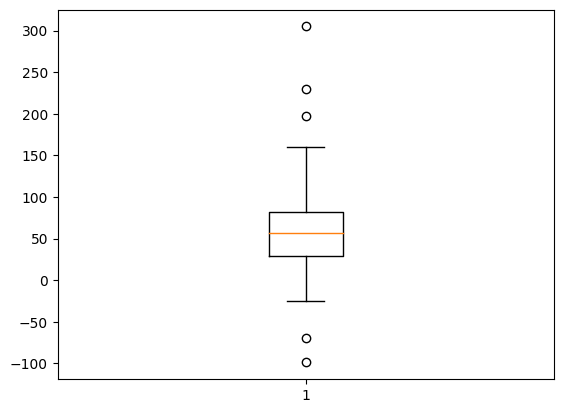

In [29]:
plt.boxplot(df['val1'])

For val1, we see two outliers below and four outliers above.



{'whiskers': [<matplotlib.lines.Line2D at 0x7f32e1e249a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32e1e24dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32e1e24700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32e1db5340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32e1db55e0>],
 'means': []}

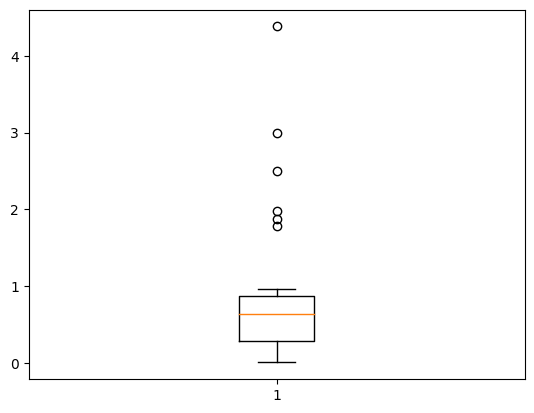

In [30]:
plt.boxplot(df['val2'])

For val2 we see six outliers above.

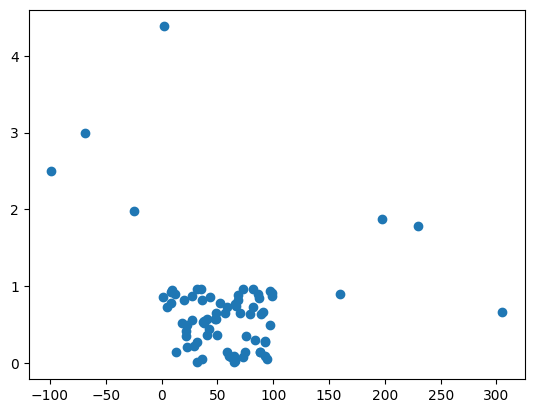

In [31]:
plt.scatter(df['val1'], df['val2'])

And here we see eight different outliers - just as we input.

**Mean and standard deviation approach**  
If a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier. The specified number of standard deviations is called the threshold. The default value is 3.

This method can fail to detect outliers because the outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected.



In [32]:
# Let's drop the outliers with standard deviation
factor = 3
upper_limit = df['val1'].mean() + df['val1'].std() * factor
lower_limit = df['val1'].mean() - df['val1'].std() * factor

df1 = df[(df['val1'] < upper_limit) & (df['val1'] > lower_limit)]
df1 #dropped two values

,val1,val2,name
0,73,0.08,eeek
1,76,0.36,woof
2,41,0.58,moo
3,8,0.93,eeek
4,52,0.79,eeek
...,...,...,...
72,22,0.42,eeek
73,65,0.01,moo
74,27,0.87,meow
75,91,0.67,woof


**Dropping the 05 and 95 percentile**

In [33]:
upper_limit = df['val1'].quantile(.95)
lower_limit = df['val1'].quantile(.05)

df1 = df[(df['val1'] < upper_limit) & (df['val1'] > lower_limit)]
df1 #dropped 9 values

,val1,val2,name
0,73,0.08,eeek
1,76,0.36,woof
2,41,0.58,moo
3,8,0.93,eeek
4,52,0.79,eeek
...,...,...,...
72,22,0.42,eeek
73,65,0.01,moo
74,27,0.87,meow
75,91,0.67,woof


**IQR range**   
Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

Steps:
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

[Source](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [34]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df['val1'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-99, -69, 197, 230, 305]


**Detecting outliers using the Z-scores**  
Loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.


In [35]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
    
sample_outliers = detect_outliers_zscore(df['val1'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [305, 230]


When we are using a smaller sample, where dropping any row might significantly affect our results, instead of dropping these values, we can cap them - change the outlier value to the upper or lower limit, or any value closer to the rest.

In [36]:
# let's do it with the percentiles
upper_limit = df['val1'].quantile(.95)
lower_limit = df['val1'].quantile(.05)

df.loc[(df['val1'] > upper_limit), 'val1'] = upper_limit
df.loc[(df['val1'] > lower_limit), 'val1'] = lower_limit

## 5. Detecting duplicates
Depending on the dataset, we might get no or many duplicates. Sometimes it might also throw off our analysis and mess up our model. Detecting the duplicates might also give us some insight to the dataset - perhaps there are the same buyers for the same item, the same price etc., but there is no IP address or email, or time, so it is possible for two different buyers to buy the same thing. Or perhaps there were two same record.

Either way, it is good to take a look on duplicate values and then decide, what to do with them. If there are just a few in a large dataset it might not cause a big fuss, but if there would be many, perhaps we should drop them.

In Pandas, there is a simple method for that in [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html).

In [37]:
dupes = sales_df[sales_df.duplicated()]
dupes #there are no duplicates in this dataset

,DATE,SHOP_ID,ITEM_ID,NET_PRICE,PROFIT_PERC,PROFIT,YEAR,MONTH,DAY


## 6. Data Standarization
Data standardization is the correction of data in such a way that they form a uniform record. It is a method of organizing data.

Thanks to data standardization, erroneous entries are corrected and duplicate addresses are removed. Data standardization is aided by reference dictionaries and special algorithms to correct incorrect entries, e.g. in names of towns or streets, in order to standardize their notation.

In this meaning of standarization, I mean standarizing the values in object columns, as if there were errors in non-numeric columns, these also would be objects.

For example:
Miła Dziekanowska
and
Miła__Dziekanowska 
are the same values, but due to the difference in spacing between my name and surname, these will become different categories, if we group by them and if we would like to aggregate all values for Miła Dziekanowska, the values from Miła__Dziekanowska won't appear there.

That's why we need to standarize these, although we already did the data type correction.

Methods for that will differ for each dataset, due to the values, sizes and topics. Also it will depent on how many unique values we will get from these columns. If we would like to have a glimse, if there are any issues on a larger dataset, we can first use a smaller random sample and see if there are any values that need standarization.

**How to standarize the data?** 
1. sort and group by the the object/string/date/etc column, one at a time, and scroll through the data - do you notice anything? Do any values have similar values? Or are ther different notations of the date? Perhaps there are any typos, abbreviations...
2. if we notice any issue, it's good to take note of it and what is happening - then we can see how to correct it - we might want to strip the values, so to delete all unnessesary white spaces, maybe use regular expressions to find similar name (Miła Dziekanowska and Mila Dziekanowska, without polish sign), maybe we need to find all abbreviations and switch to full names or other way round.


## 7. Data Discretization and binning
Discretization is a process of of transferring continuous functions, models, variables, and equations into discrete counterparts. When we discretize the data, we group it, so that instead of plenty values, we would have only a few - many categories are not best suited for machine learning and other algorithms.

![en_column_basic_fig5.1.jpg](https://www.cradle-cfd.com/dcms_media/image/en_column_basic_fig5.1.jpg)

Advantages of using data discretization:
- It's much easier to maintain;
- Might give us more insight on the data;
- Prepares data for future analysis - classificaiton or other modeling;
- It is considered data reduction, therefore reduces time and processing;
- Some models need to have the data discretized.

**How to discretize the data?**
1. Sort the values we want to dicretize
2. Evaluate the groups or splitting points
3. Split or divide the data into the groups we evaluated
4. If needed, divide or split it more, if it helps the model or our analysis

There are a few ways to do the data discretization. In here we will work with binning, but for more, check in [here](https://medium.com/codex/data-discretization-b5faa2b77f06).



In [ ]:
# let's get a new dataset in here
s = pd.DataFrame(data=[x**2 for x in range(11)],
              index=list('abcdefghijk'))
s

**How to bin the data**  
- We need to decide on the number of bins - what will suit our dataset and give the best insight;
- We also need to decide the width of the data on continuous data (if we are doing this on object data, we need to make sure that the new categories will be on the same level - countries, types, etc);
- Going from planning to doing - we need to sort the data if they are not sorted yet;
- Use one of the methods to divide the values in the column to bins;
- Check if it gives us the result we wanted.

**! IMPORTANT !**  
When we are working on an open dataset, where we are expecting to receive new data in the future - it is best to desing additional bin for all the outliers that might appear in the future - since the binning will work once and include the current max and min value and if an outlier happens, it might not be included in any bin.
Therefore it is a good to make an additional bin for values from - ∞ to ∞.


[More on binning](https://pbpython.com/pandas-qcut-cut.html)

In [42]:
# pd.qcut() divides the values into q number of bins, where the bins are even/ close to even in size
pd.qcut(s[0], q=3)

a    (-0.001, 11.333]
b    (-0.001, 11.333]
c    (-0.001, 11.333]
d    (-0.001, 11.333]
e    (11.333, 44.667]
f    (11.333, 44.667]
g    (11.333, 44.667]
h     (44.667, 100.0]
i     (44.667, 100.0]
j     (44.667, 100.0]
k     (44.667, 100.0]
Name: 0, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 11.333] < (11.333, 44.667] < (44.667, 100.0]]

In [45]:
# pd.cut() divides the values into q number of bins, where the bins have equal/almost equal range
pd.cut(s[0], 3)

a      (-0.1, 33.333]
b      (-0.1, 33.333]
c      (-0.1, 33.333]
d      (-0.1, 33.333]
e      (-0.1, 33.333]
f      (-0.1, 33.333]
g    (33.333, 66.667]
h    (33.333, 66.667]
i    (33.333, 66.667]
j     (66.667, 100.0]
k     (66.667, 100.0]
Name: 0, dtype: category
Categories (3, interval[float64, right]): [(-0.1, 33.333] < (33.333, 66.667] < (66.667, 100.0]]

For categorical data, there is no method or function, so we will have to write our own - since the data will be different in every dataset.

We will also write our functions for numeric data as well, depending on the issue. The `pd.cut()` and `pd.qcut()` methods are not the only way to divide the data, rather a tool that might show us some dependencies.


In [50]:
s = s.reset_index() #let's get some categorical data

In [51]:
def new_bin(name):
  if name in ['a', 'b', 'c', 'd']:
    return 'A'
  elif name in ['e', 'f', 'g', 'h']:
    return 'B'
  else:
    return 'C'

s['index'] = s['index'].apply(new_bin)
s

,index,0
0,A,0
1,A,1
2,A,4
3,A,9
4,B,16
5,B,25
6,B,36
7,B,49
8,C,64
9,C,81


## 8. Data Normalization
Data normalization, similarly to data discretization, is something that will help us prepare the data for further analysis. It will not always be required, however it will provide additional insight.

We can distinguish two things in here::
- **data normalization**, which is also called min-max scaling, which will fix the values in the set to be in range <0,1>, using the following formula: `(x - min(x))/(max(x) - min(x))`
- **data standarization**, in a different sence than mentioned in a section above, also known as z-score normalization, which will provide the data in rance <-1, 1>, where 0 is the mean value. The formula for standarization is `(x - mean(x))/standard deviation(x)`

The goal of feature scaling is to ensure that each feature contributes equally to the analysis and avoid one feature dominating over the others.

In [ ]:
# lets go back to sales_df
sales_df

In [56]:
# For this example, let's standardize the profit
# normalization

sales_df['NORM_PROFIT'] = (sales_df['PROFIT'] - sales_df['PROFIT'].min()) / (sales_df['PROFIT'].max() - sales_df['PROFIT'].min())
sales_df

,DATE,SHOP_ID,ITEM_ID,NET_PRICE,PROFIT_PERC,PROFIT,YEAR,MONTH,DAY,NORM_PROFIT
0,2022-05-01,1,1,416.0,9,37.44,2022,5,1,0.508986
1,2022-05-02,1,1,454.0,2,9.08,2022,5,2,0.087777
2,2022-05-03,1,1,392.0,13,50.96,2022,5,3,0.709788
3,2022-05-04,1,1,498.0,9,44.82,2022,5,4,0.618595
4,2022-05-05,1,1,341.0,15,51.15,2022,5,5,0.712610
...,...,...,...,...,...,...,...,...,...,...
130,2022-05-11,3,3,374.0,7,26.18,2022,5,11,0.341750
131,2022-05-12,3,3,390.0,4,15.60,2022,5,12,0.184613
132,2022-05-13,3,3,485.0,10,48.50,2022,5,13,0.673251
133,2022-05-14,3,3,479.0,3,14.37,2022,5,14,0.166345


In [57]:
# standarization
sales_df['STAND_PROFIT'] = (sales_df['PROFIT'] - sales_df['PROFIT'].mean()) / sales_df['PROFIT'].std()
sales_df

,DATE,SHOP_ID,ITEM_ID,NET_PRICE,PROFIT_PERC,PROFIT,YEAR,MONTH,DAY,NORM_PROFIT,STAND_PROFIT
0,2022-05-01,1,1,416.0,9,37.44,2022,5,1,0.508986,0.430325
1,2022-05-02,1,1,454.0,2,9.08,2022,5,2,0.087777,-1.301341
2,2022-05-03,1,1,392.0,13,50.96,2022,5,3,0.709788,1.255858
3,2022-05-04,1,1,498.0,9,44.82,2022,5,4,0.618595,0.880949
4,2022-05-05,1,1,341.0,15,51.15,2022,5,5,0.712610,1.267459
...,...,...,...,...,...,...,...,...,...,...,...
130,2022-05-11,3,3,374.0,7,26.18,2022,5,11,0.341750,-0.257212
131,2022-05-12,3,3,390.0,4,15.60,2022,5,12,0.184613,-0.903229
132,2022-05-13,3,3,485.0,10,48.50,2022,5,13,0.673251,1.105650
133,2022-05-14,3,3,479.0,3,14.37,2022,5,14,0.166345,-0.978333


The normalization and serialization can also be done with one-liners from scikitlearn in preprocessing. 

## 9. Log Transformations
